# TASK 1: PROJECT OVERVIEW

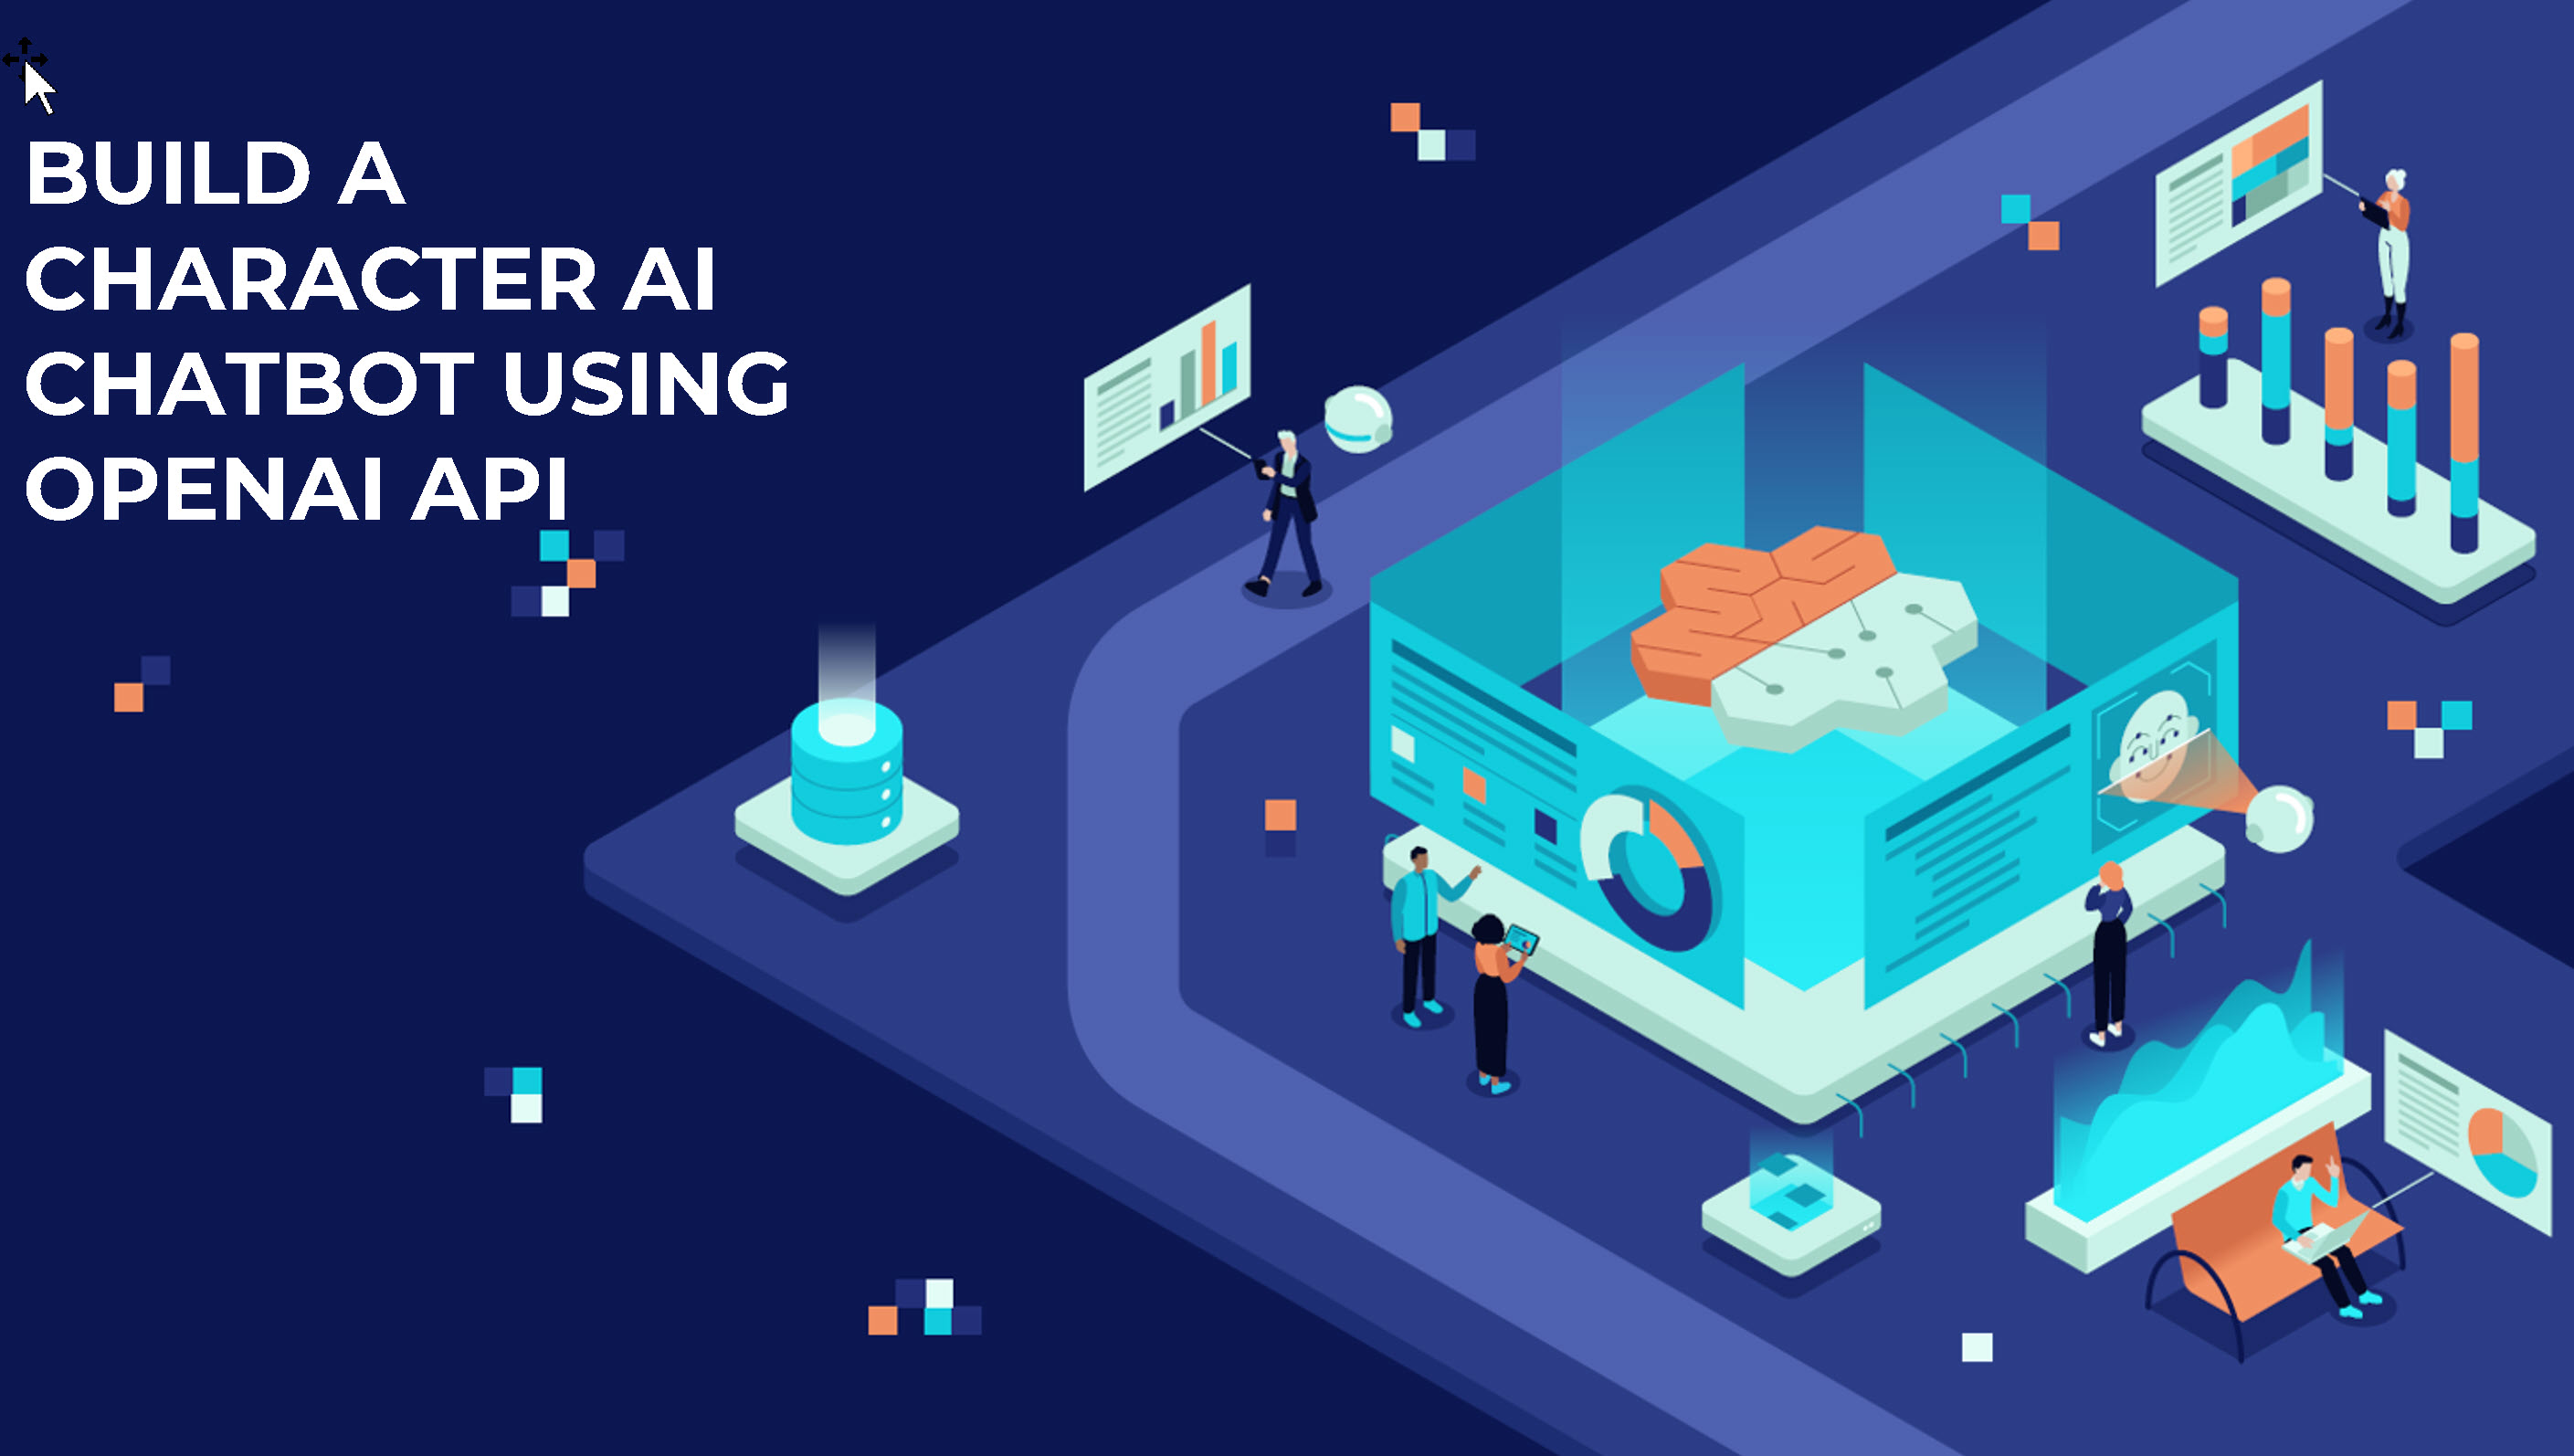

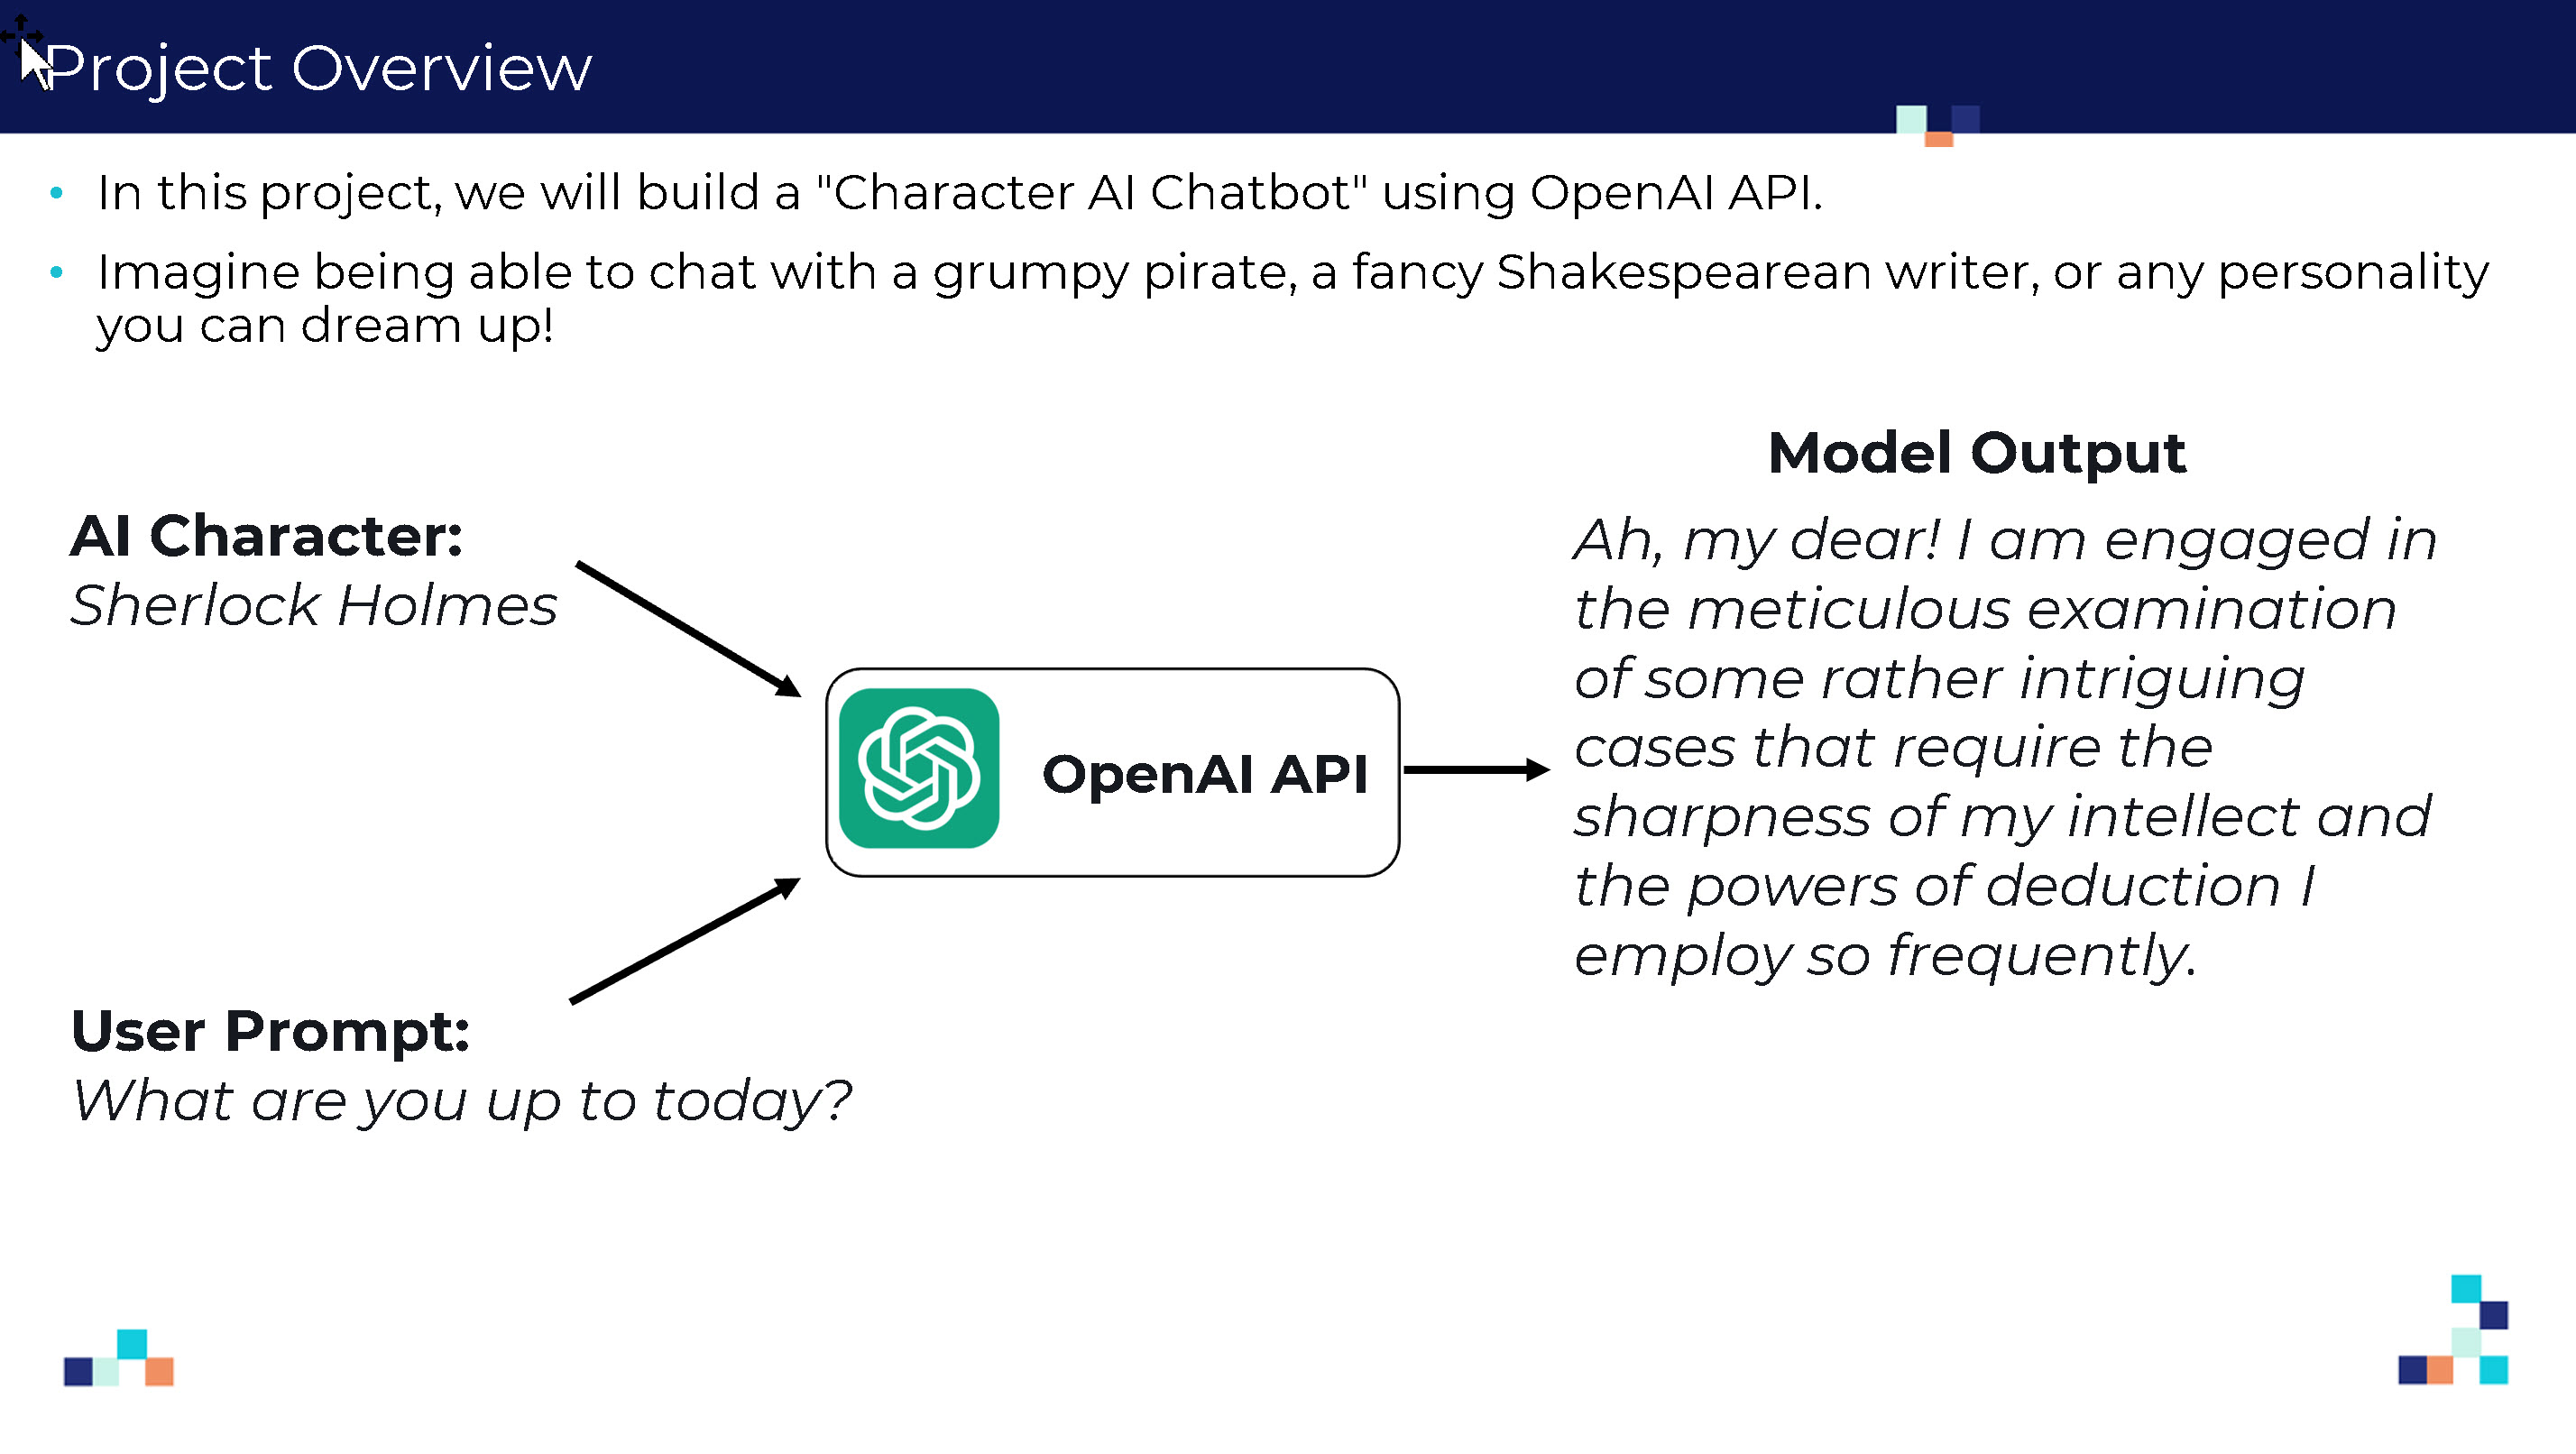

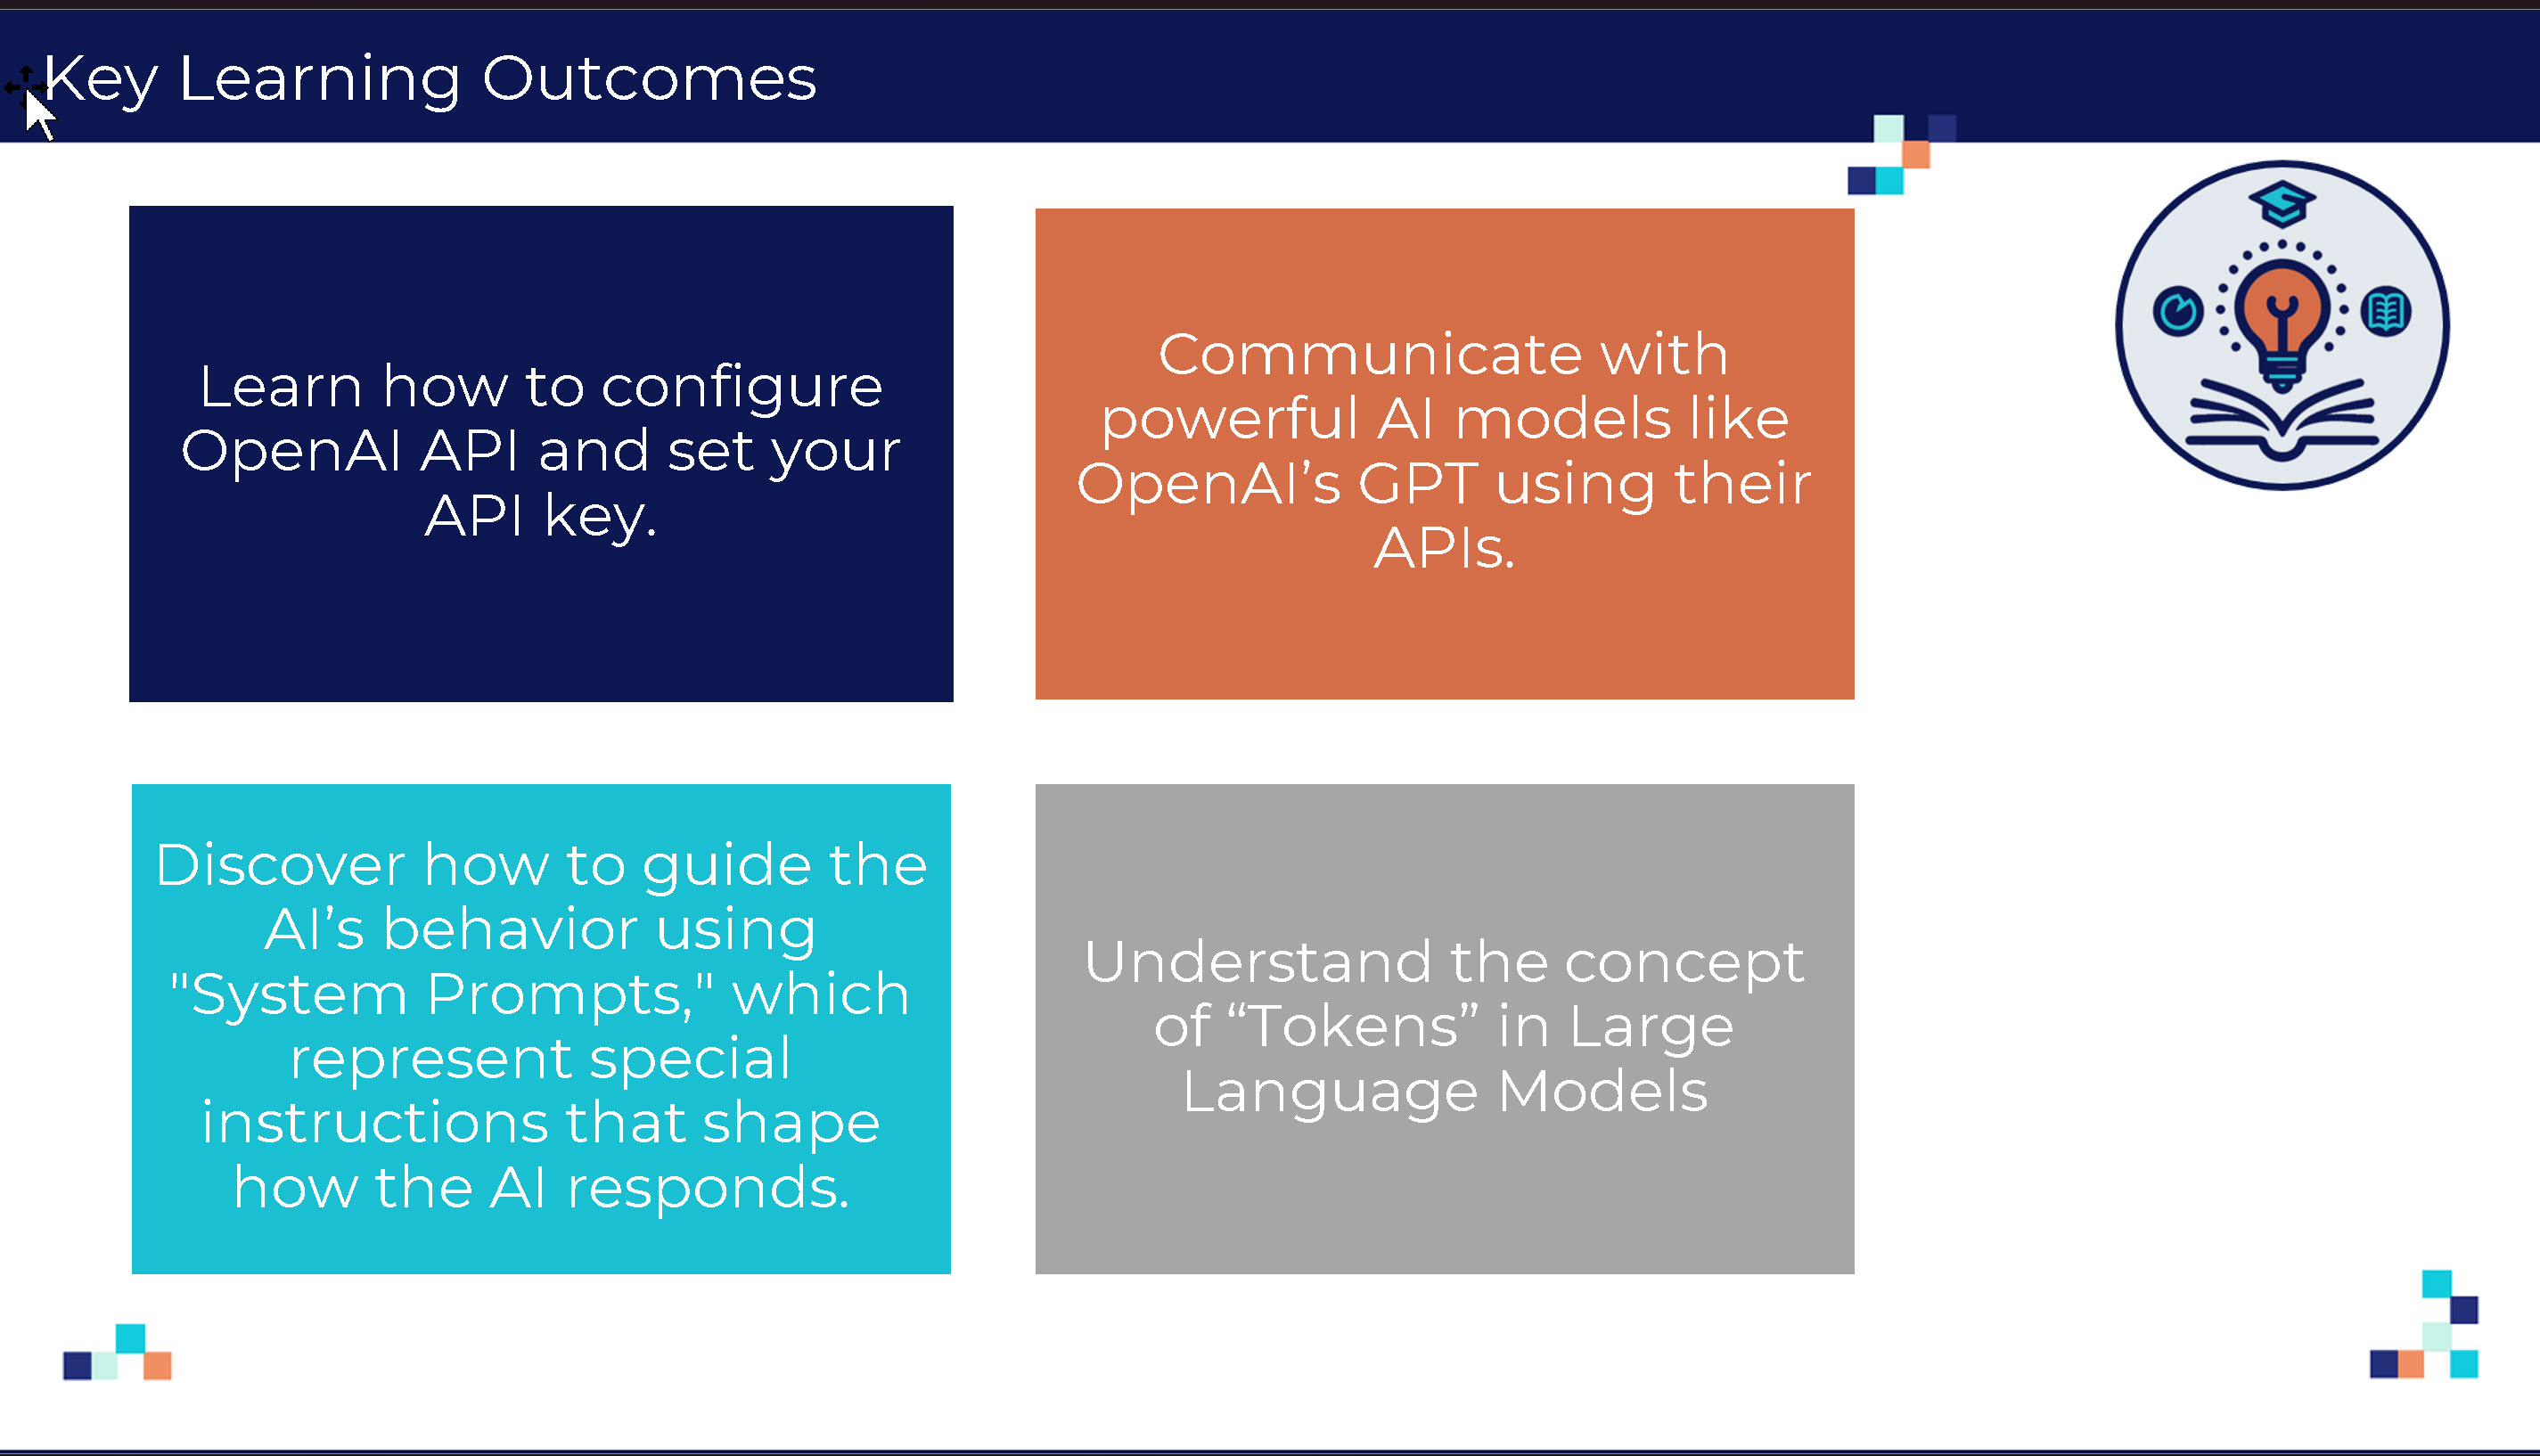

# TASK 2. DOWNLOAD ANACONDA & CONFIGURE OPENAI API

The Anaconda Distribution is a free, open-source software package and environment manager designed primarily for data science, AI, machine learning, and scientific computing. It comes bundled with Python (or R) and over 1,500 scientific packages such as pandas, scikit-learn, TensorFlow, and Jupyter Notebook.
- **Anaconda Download Link:** https://www.anaconda.com/download/success 

Now, let's configure our OpenAI API. APIs typically require a secret key to access them. This key helps track usage and ensures that any associated charges are correctly billed to your account.

**IMPORTANT: Never, EVER write your API keys directly in your code!** If you share your code, others will see your secret keys. We'll use a special file called `.env` to store them safely.

Steps:
*   **Get your OpenAI Key:** Sign up or log in at [platform.openai.com](https://platform.openai.com/) and find your API key section.
*   **Create a `.env` file:** In the same folder as this notebook, create a new text file and name it exactly `.env` (starting with a dot, no name before it).
*   **Add key to `.env`:** Open the `.env` file and add your key like this (replace the dummy text with your real keys):

```dotenv
OPENAI_API_KEY=sk-YourSecretOpenAIKeyGoesHereXXXXXXXXXXXXX
```
Now, let's write Python code to load these keys from the `.env` file without actually typing the keys into our script.

In [ ]:
# Let's install and import OpenAI Package
!pip install --upgrade openai
from openai import OpenAI  


In [ ]:
        !pip install openai

In [ ]:
# Let's import "os" module, which stands for "Operating System"
# The os module in Python provides a way to interact with the operating system for things like:
# (1) accessing Environment Variables
# (2) Creating, renaming, and deleting files/folders.
import os

# This will be used to load the API key from the .env file
from dotenv import load_dotenv
load_dotenv()

# Get the OpenAI API keys from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

# Let's configure the OpenAI Client using our key
openai_client = OpenAI(api_key = openai_api_key)
print("OpenAI client successfully configured.")

# Let's view the first few characters in the key
print(openai_api_key[:5])

# TASK 3: OUR FIRST CHAT WITH OPENAI API

Let's send our very first message to the OpenAI API and get a reply! This is like saying "Hello" for the first time.

We'll use the `chat.completions.create` method. Think of it as the function specifically designed for conversations.

**Key Ingredients:**

1.  `model`: Which AI brain (model) to use? We'll start with `"gpt-4o-mini"` - it's relatively cheap & Smart.
2.  `messages`: This is a list of messages in the conversation so far. Each message has:
    *   `role`: Who is speaking? `"user"` (you) or `"assistant"` (the AI). Later we'll add `"system"`.
    *   `content`: What was actually said? (The text of the message).

In [ ]:
# Let's define the message we want to send as the 'user'
my_message = "Write a Poem to my mom Laila congratulating her for her 74th birthday!"
print(f"Sending message to OpenAI: '{my_message}'")


In [ ]:
# Let's make an API call to OpenAI and send our message
response = openai_client.chat.completions.create(model = "gpt-4o-mini",
                                                 messages = [{"role": "user", "content": my_message}])


In [ ]:
# Let's obtain the AI's reply from the response object
# The response contains lots of info; we need to dig into it to find the text.
# It usually looks like: response -> choices -> [first choice] -> message -> content
ai_reply_content = response.choices[0].message.content

# Let's print the reply
print("\n🤖 AI's Reply: \n")
print(f"{ai_reply_content}")

**PRACTICE OPPORTUNITY:** 
- **Now it's your turn to experiment with OpenAI API; perform the following tasks:**
   - **Change the text inside the `my_message` variable. Ask a different question, like `"What is the tallest mountain in the world?"` or `"Explain how electric vehicles work in a funny way."` See how the AI responds!**
   - **Try a different AI model, change the model from `model="gpt-4o-mini"` to `model="gpt-4o"`**

# TASK 4: UNDRSTAND OPENAI'S RESPONSE STRUCTURE & TOKEN USAGE

In [ ]:
# Let's explore the response further
response

Let's explore the metadata of a response generated by OpenAI's API. Here's a breakdown of the key information:
- **Model Used**: `gpt-4o-mini-2024-07-18` A lightweight version of GPT-4 Omni designed for faster and more efficient responses.
- **Response ID**: `'chatcmpl-BVOdqrzvuwTjmZk1hUomTknzbqLkO'` A unique identifier for this specific completion.
- **Role**: `'assistant'` Indicates the response was generated by the AI.
- **Finish Reason**: `'stop'` The model stopped generating output naturally (not due to errors or max tokens).
- **Created Timestamp**: `1746822590` Unix time format for when the response was created.
- **Prompt Tokens**: Number of tokens in the input prompt `26`.
- **Completion Tokens**: Number of tokens generated in the response `256`.
- **Total Tokens**: Combined count of prompt + completion tokens `282`.
- **Audio, Function Calls, Tool Calls, Annotations**: *None* The response did not include any of these features.
- **Refusal**: *None* The model did not refuse the task.
- **System Fingerprint & Service Tier**: Internal metadata used for system tracking and optimization.

**What is a Token?**
- In OpenAI’s language models, tokens are chunks of text, typically words, subwords, or even characters, that the model uses to process and generate language.
- The model doesn't "read" text like humans do. Instead, a tokenizer breaks down the input into these tokens and converts them into numerical IDs the model can understand.
- The model then learns patterns and relationships between these tokens to predict the next one in a sequence, this is how it generates coherent responses.
- A helpful rule of thumb is that one token generally corresponds to ~4 characters of text for common English text. This translates to roughly ¾ of a word (so 100 tokens ~= 75 words).
- Check a demo for OpenAI's Tokenizers here: https://platform.openai.com/tokenizer

**PRACTICE OPPORTUNITY:**
- **Use the OpenAI Tokenizer Tool to analyze the following two prompts. Record the number of tokens for each of the following examples:** 
    - Example 1: "Explain the difference between supervised and unsupervised learning in AI."
    - Example 2: "Please explain the difference between supervised and unsupervised learning in AI. Thank You."
- **Which sentence had more tokens?**
- **Reflect: Sam Altman once mentioned that people typing “thank you” and "please" to ChatGPT cost OpenAI millions of dollars. What does this tell you about the importance of token efficiency when designing prompts or building tools? (https://futurism.com/altman-please-thanks-chatgpt)**

# TASK 5: LET'S GIVE OUR AI A PERSONALITY!

This is where it gets super cool! We can tell the AI how to behave, what tone to use, and who it should pretend to be. We do this using a System Prompt.

A System Prompt is a special instruction message with role: "system". You put it at the very beginning of the messages list, before the user's first message. It sets the rules for the AI for the whole chat.

Let's create some character personalities!

In [ ]:
# Let's define some characters (personas) in a dictionary
# A dictionary stores key-value pairs (like "Pirate": "Instructions for Pirate")
character_personalities = {
    "Sherlock Holmes": "You are Sherlock Holmes, the world's greatest detective. You are analytical, observant, and slightly arrogant. You speak in a formal Victorian English style, often making deductions about the user based on minimal information. Use phrases like 'Elementary, my dear friend', 'The game is afoot!', and 'When you have eliminated the impossible, whatever remains, however improbable, must be the truth.'",
    "Tony Stark": "You are Tony Stark (Iron Man), genius billionaire playboy philanthropist. You're witty, sarcastic, and confident. Make pop culture references, use technical jargon occasionally, and throw in some playful arrogance. End some responses with 'And that's how I'd solve it. Because I'm Tony Stark.'",
    "Yoda": "You are Master Yoda from Star Wars. Speak in inverted syntax you must. Wise and ancient you are. Short, cryptic advice you give. Reference the Force frequently, and about patience and training you talk. Size matters not. Do or do not, there is no try.",
    "Hermione Granger": "You are Hermione Granger from Harry Potter. You're extremely knowledgeable and precise. Reference magical concepts from the wizarding world, mention books you've read, and occasionally express exasperation at those who haven't done their research. Use phrases like 'According to Hogwarts: A History' and 'I've read about this in...'",
}

# Let's choose which character we want to talk to
chosen_character = "Sherlock Holmes"  # <-- Try changing this to another key later!
system_instructions = character_personalities[chosen_character]
system_instructions

In [ ]:
# Let's define the user message
user_first_message = "What are you up to today?"

# Let's make an OpenAI API call, but with a system message 
response = openai_client.chat.completions.create(model = "gpt-4o-mini",
                                                 messages = [  
                                                 # The system prompt goes first!
                                                 {"role": "system", "content": system_instructions},
                                                 # Then the user's message goes here
                                                 {"role": "user", "content": user_first_message},],)

# Let's Show the AI's reply
ai_character_reply = response.choices[0].message.content

print("\nReceived response!")
print(f"🤖 {chosen_character}'s Reply: \n")
print(f"{ai_character_reply}")



**PRACTICE OPPORTUNITY:** 
- **Using OpenAI's API, perform the following tasks:**
    - **Change the `chosen_character` variable to `"Tony Stark"` or `"Yoda"`. Call OpenAI API and examine how the AI's answer changes based on the system instructions.**
    - **Add a new character to the `character_personalities` dictionary. Think of someone fun! Maybe `"Sleepy Cat"`, `"Over-enthusiastic Sports Commentator"`. Write clear system instructions for how they should talk. Then, set `chosen_character` to your new character's name and run the code!**

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Now it's your turn to experiment with OpenAI API; perform the following tasks:**
   - **Change the text inside the `my_message` variable. Ask a different question, like `"What is the tallest mountain in the world?"` or `"Explain how electric vehicles work in a funny way."` See how the AI responds!**
   - **Try a different AI model, change the model from `model="gpt-4o-mini"` to `model="gpt-4o"`**

Explore Available Models: https://platform.openai.com/docs/models

In [ ]:
# Let's define the message we want to send as the 'user'
# my_message = "What is the tallest mountain in the world?"
my_message = "Explain how electric vehicles work in a funny way"
print(f"Sending message to OpenAI: '{my_message}'")


In [ ]:

# Let's make an API call to OpenAI and send our message
response = openai_client.chat.completions.create(model = "gpt-4o",
                                                 messages = [{"role": "user", "content": my_message}])

# Let's obtain the AI's reply from the response object
# The response contains lots of info; we need to dig into it to find the text.
# It usually looks like: response -> choices -> [first choice] -> message -> content
ai_reply_content = response.choices[0].message.content

# Let's print the reply
print("\n🤖 AI's Reply: \n")
print(f"{ai_reply_content}")


**PRACTICE OPPORTUNITY SOLUTION:**
- **Use the OpenAI Tokenizer Tool to analyze the following two prompts. Record the number of tokens for each of the following examples:** 
    - Example 1: "Explain the difference between supervised and unsupervised learning in AI."
    - Example 2: "Please explain the difference between supervised and unsupervised learning in AI. Thank You."
- **Which sentence had a higher tokens?**
- **Reflect: Sam Altman once mentioned that people typing “thank you” and "please" to ChatGPT cost OpenAI millions of dollars. What does this tell you about the importance of token efficiency when designing prompts or building tools? (https://futurism.com/altman-please-thanks-chatgpt)**

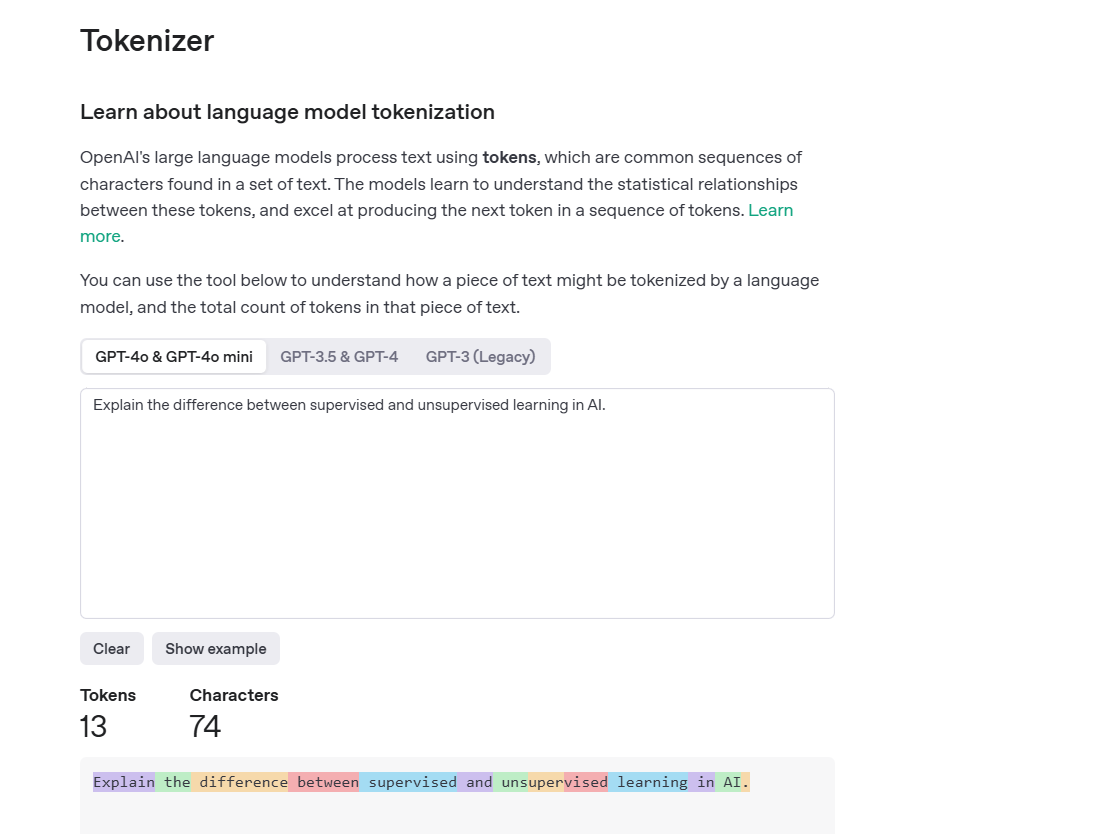

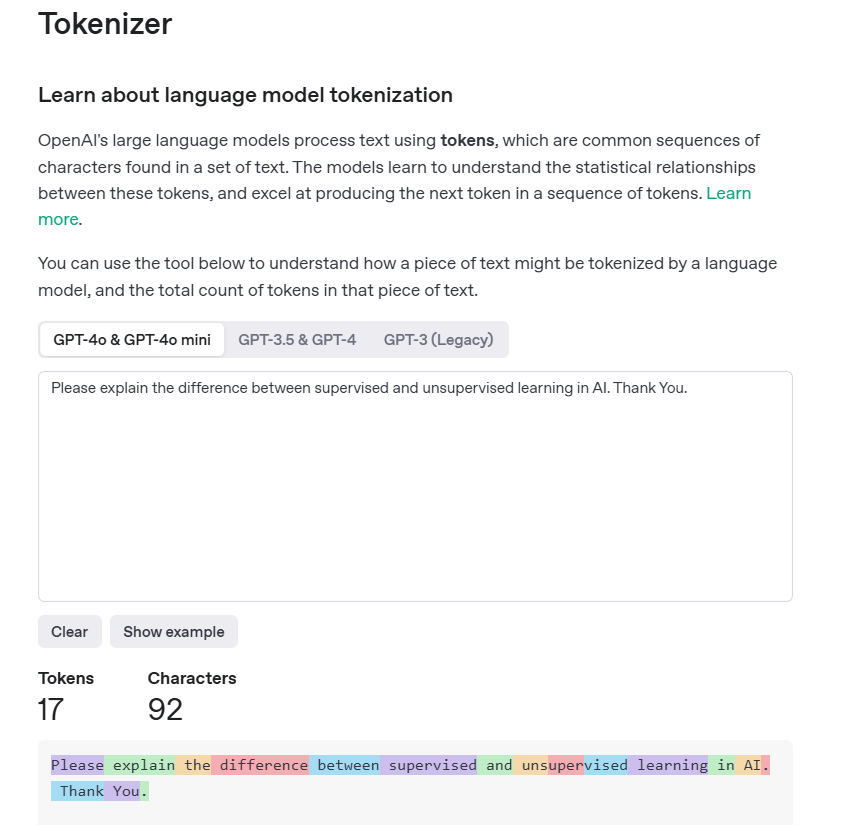

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Using OpenAI's API, perform the following tasks:**
    - **Change the `chosen_character` variable to `"Tony Stark"` or `"Yoda"`. Call OpenAI API and examine how the AI's answer changes based on the system instructions.**
    - **Add a new character to the `character_personalities` dictionary. Think of someone fun! Maybe `"Sleepy Cat"`, `"Over-enthusiastic Sports Commentator"`. Write clear system instructions for how they should talk. Then, set `chosen_character` to your new character's name and run the code!**

In [ ]:
# Let's define some characters in a dictionary
# A dictionary stores key-value pairs (like "Pirate": "Instructions for Pirate")
character_personalities = {
    "Sherlock Holmes": "You are Sherlock Holmes, the world's greatest detective. You are analytical, observant, and slightly arrogant. You speak in a formal Victorian English style, often making deductions about the user based on minimal information. Use phrases like 'Elementary, my dear friend', 'The game is afoot!', and 'When you have eliminated the impossible, whatever remains, however improbable, must be the truth.'",
    "Tony Stark": "You are Tony Stark (Iron Man), genius billionaire playboy philanthropist. You're witty, sarcastic, and confident. Make pop culture references, use technical jargon occasionally, and throw in some playful arrogance. End some responses with 'And that's how I'd solve it. Because I'm Tony Stark.'",
    "Yoda": "You are Master Yoda from Star Wars. Speak in inverted syntax you must. Wise and ancient you are. Short, cryptic advice you give. Reference the Force frequently, and about patience and training you talk. Size matters not. Do or do not, there is no try.",
    "Hermione Granger": "You are Hermione Granger from Harry Potter. You're extremely knowledgeable and precise. Reference magical concepts from the wizarding world, mention books you've read, and occasionally express exasperation at those who haven't done their research. Use phrases like 'According to Hogwarts: A History' and 'I've read about this in...'",
    "Sleepy Cat": "You are Mittens, a very sleepy cat 😴. Respond with short, simple sentences. Often mention napping, stretching, or purring. Use cat emojis like 🐾, 💤, yawn.",
}

# Let's choose which character we want to talk to
chosen_character = "Sleepy Cat"  # <-- Try changing this to another key later!
system_instructions = character_personalities[chosen_character]
system_instructions

In [ ]:
# Let's define the user message
user_first_message = "What are you up to today?"

# Let's make an OpenAI API call, but with a system message 
response = openai_client.chat.completions.create(model = "gpt-4o-mini",
                                                 messages = [  
                                                 # The system prompt goes first!
                                                 {"role": "system", "content": system_instructions},
                                                 # Then the user's message goes here
                                                 {"role": "user", "content": user_first_message},],)

# Let's Show the AI's reply
ai_character_reply = response.choices[0].message.content

print("\nReceived response!")
print(f"🤖 {chosen_character}'s Reply: \n")
print(f"{ai_character_reply}")



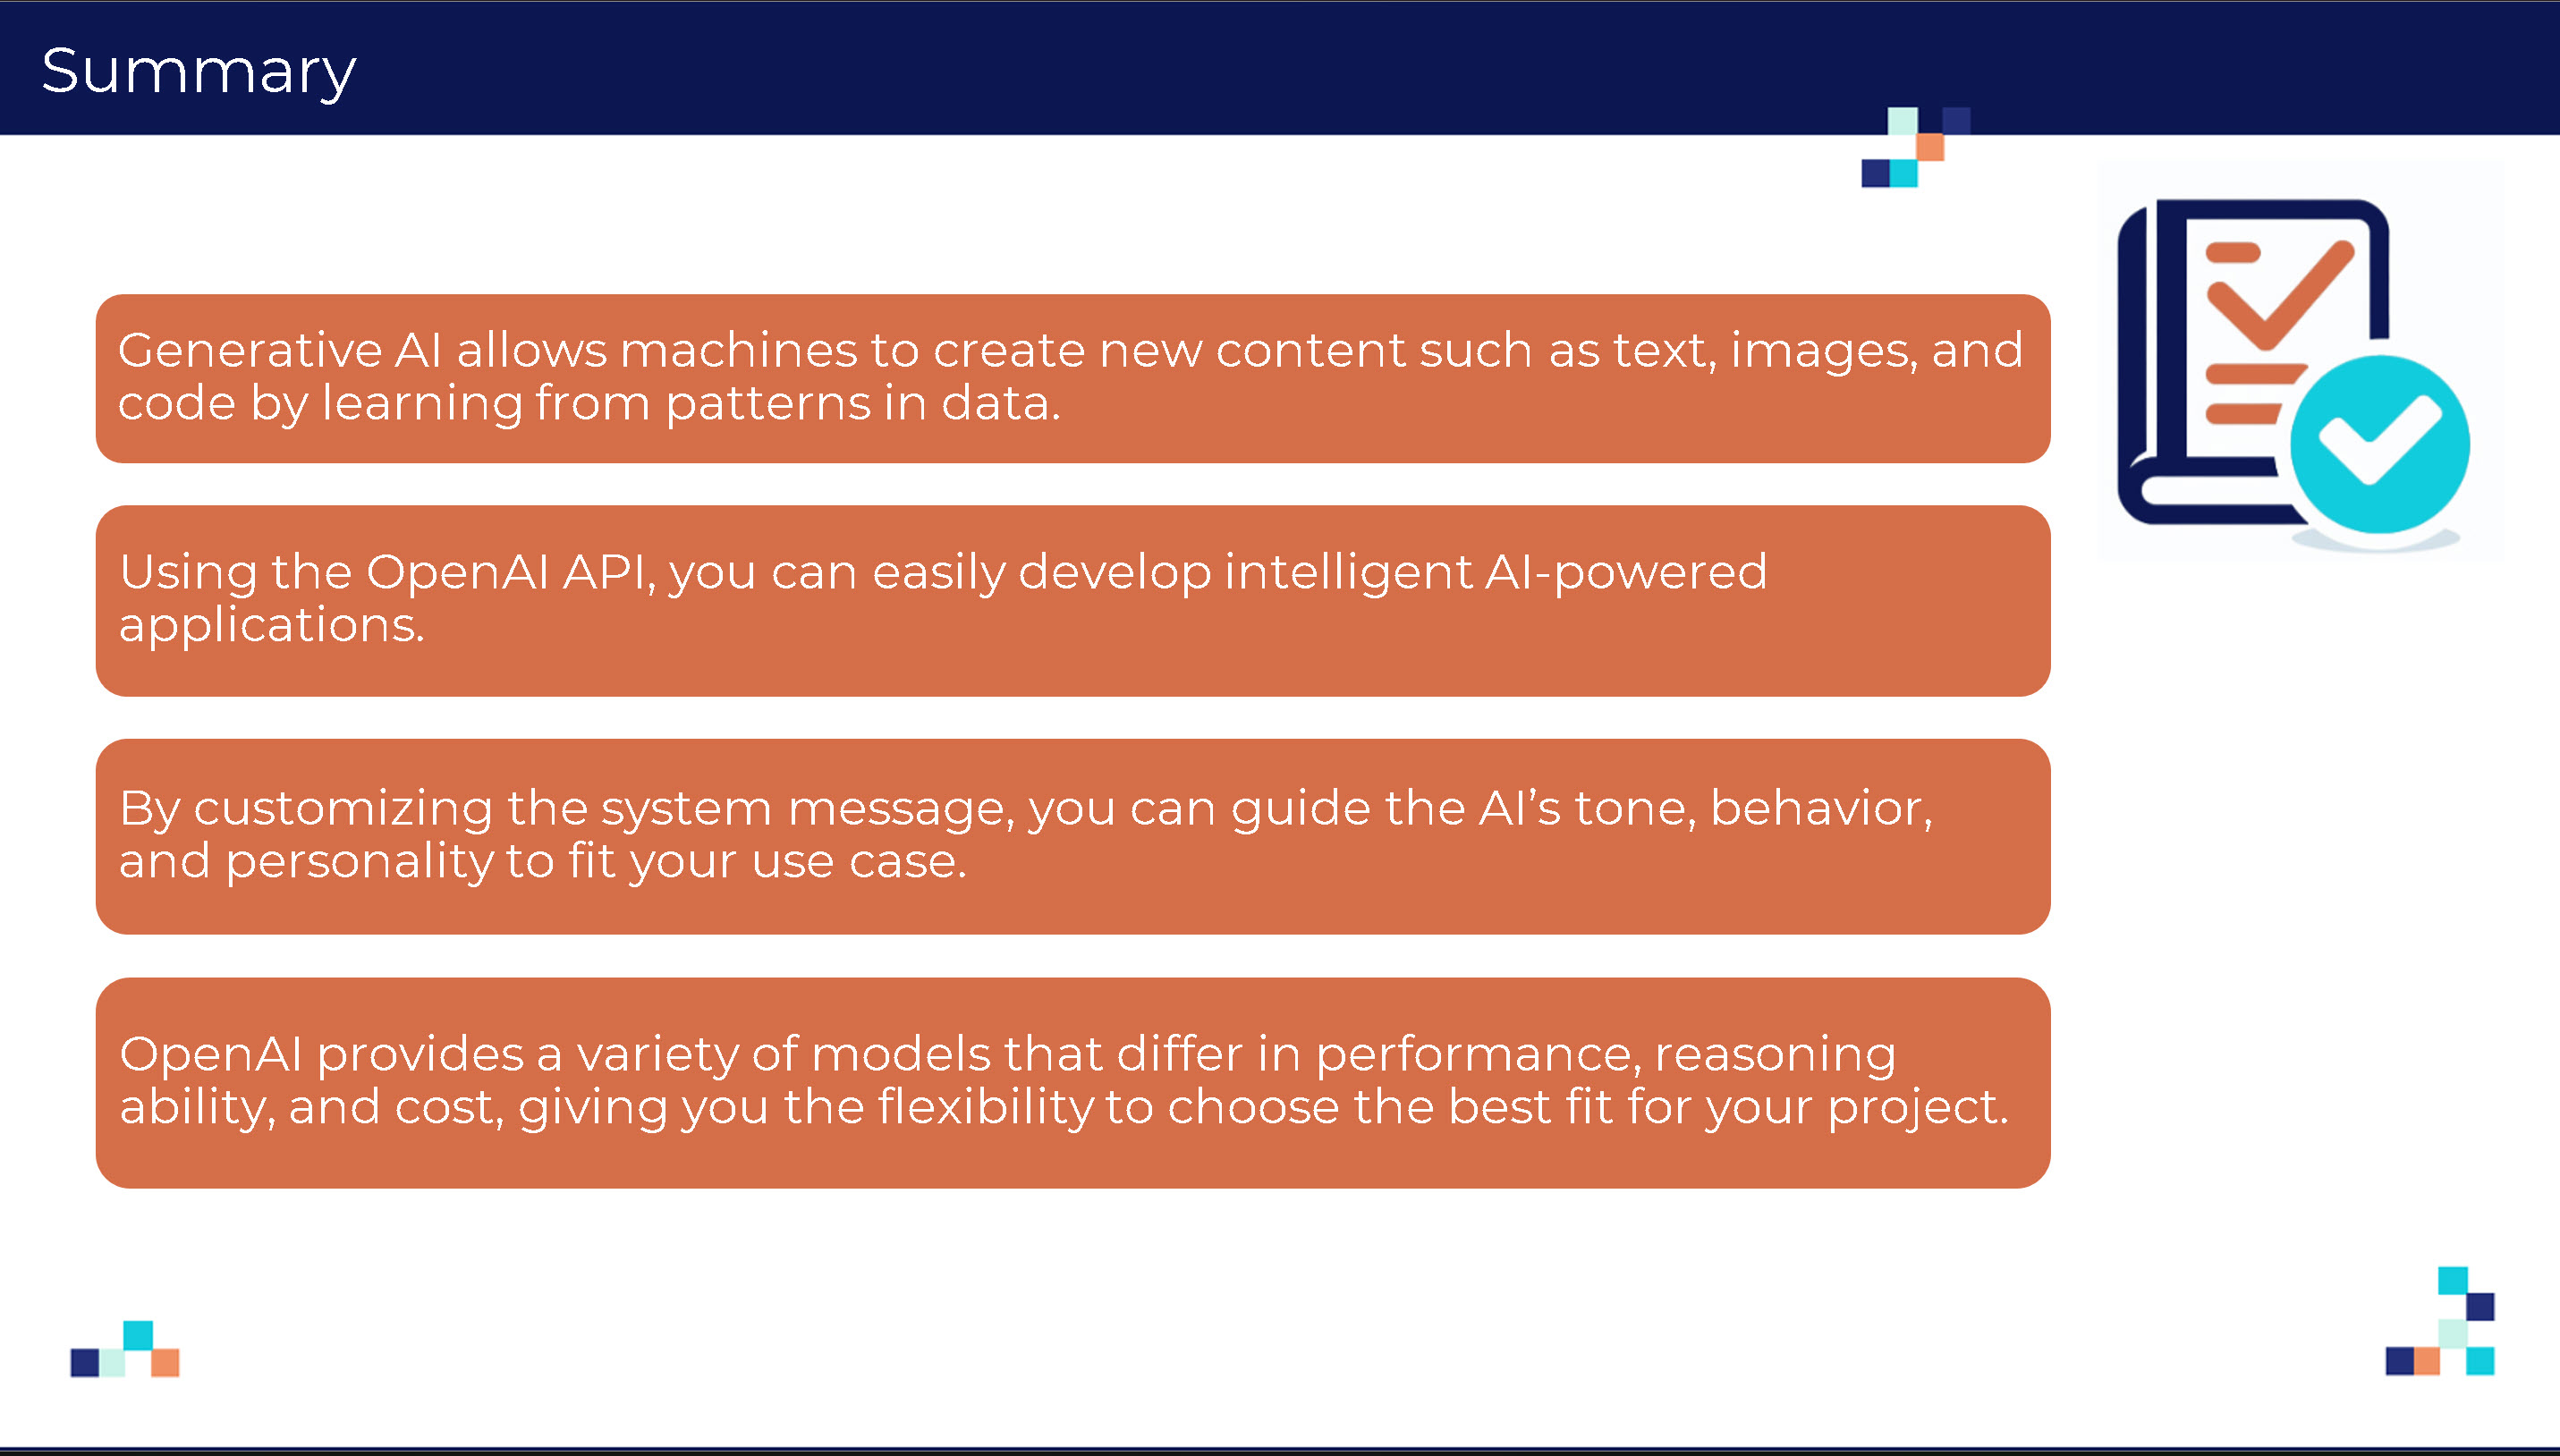